<a href="https://colab.research.google.com/github/inmira/Credit-Risk/blob/main/Credit_Risk_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
default_of_credit_card_clients = fetch_ucirepo(id=350)

# data (as pandas dataframes)
X = default_of_credit_card_clients.data.features
y = default_of_credit_card_clients.data.targets

# metadata
print(default_of_credit_card_clients.metadata)

# variable information
print(default_of_credit_card_clients.variables)


{'uci_id': 350, 'name': 'Default of Credit Card Clients', 'repository_url': 'https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients', 'data_url': 'https://archive.ics.uci.edu/static/public/350/data.csv', 'abstract': "This research aimed at the case of customers' default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods.", 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 30000, 'num_features': 23, 'feature_types': ['Integer', 'Real'], 'demographics': ['Sex', 'Education Level', 'Marital Status', 'Age'], 'target_col': ['Y'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Fri Mar 29 2024', 'dataset_doi': '10.24432/C55S3H', 'creators': ['I-Cheng Yeh'], 'intro_paper': {'ID': 365, 'type': 'NATIVE', 'title': 'The comparisons of data mining techniques for the predictive accuracy of 

In [3]:
import pandas as pd
import numpy as np

from ucimlrepo import fetch_ucirepo

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

# =========================
#  LOAD DATA
# =========================

dataset = fetch_ucirepo(id=350)

X = dataset.data.features
y = dataset.data.targets

# target jako seria
y = y.squeeze()

# połączenie w jeden df (do EDA)
df = pd.concat([X, y], axis=1)

print(df.head())
print(df.info())

# =========================
#  EDA
# =========================

print("\nTarget distribution:")
print(y.value_counts(normalize=True))

print("\nMissing values:")
print(df.isnull().sum().sum())

# =========================
#  TRAIN TEST SPLIT
# =========================

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# =========================
# LOGISTIC REGRESSION
# =========================

lr = LogisticRegression(max_iter=2000)

lr.fit(X_train, y_train)

pred_lr = lr.predict_proba(X_test)[:,1]

print("\nLogistic ROC-AUC:", roc_auc_score(y_test, pred_lr))

# =========================
# RANDOM FOREST
# =========================

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

rf.fit(X_train, y_train)

pred_rf = rf.predict_proba(X_test)[:,1]

print("\nRandom Forest ROC-AUC:", roc_auc_score(y_test, pred_rf))

# =========================
#  FEATURE IMPORTANCE
# =========================

feat_imp = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

print("\nTop risk factors:")
print(feat_imp.head(10))

# =========================
# CONFUSION MATRIX
# =========================

pred_class = rf.predict(X_test)

print("\nConfusion matrix:")
print(confusion_matrix(y_test, pred_class))

print("\nClassification report:")
print(classification_report(y_test, pred_class))


       X1  X2  X3  X4  X5  X6  X7  X8  X9  X10  ...    X15    X16    X17  \
0   20000   2   2   1  24   2   2  -1  -1   -2  ...      0      0      0   
1  120000   2   2   2  26  -1   2   0   0    0  ...   3272   3455   3261   
2   90000   2   2   2  34   0   0   0   0    0  ...  14331  14948  15549   
3   50000   2   2   1  37   0   0   0   0    0  ...  28314  28959  29547   
4   50000   1   2   1  57  -1   0  -1   0    0  ...  20940  19146  19131   

    X18    X19    X20   X21   X22   X23  Y  
0     0    689      0     0     0     0  1  
1     0   1000   1000  1000     0  2000  1  
2  1518   1500   1000  1000  1000  5000  0  
3  2000   2019   1200  1100  1069  1000  0  
4  2000  36681  10000  9000   689   679  0  

[5 rows x 24 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X1      30000 non-null  int64
 1   X2      30000 non-null  int64
 

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic ROC-AUC: 0.7089652739018791

Random Forest ROC-AUC: 0.7544770895221165

Top risk factors:
X6     0.100285
X5     0.066296
X1     0.060362
X12    0.059467
X13    0.054631
X14    0.051356
X17    0.050661
X18    0.050659
X15    0.050188
X16    0.050154
dtype: float64

Confusion matrix:
[[4390  283]
 [ 843  484]]

Classification report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4673
           1       0.63      0.36      0.46      1327

    accuracy                           0.81      6000
   macro avg       0.73      0.65      0.67      6000
weighted avg       0.79      0.81      0.79      6000



Model Random Forest osiągnął ROC-AUC na poziomie 0.75, co wskazuje na umiarkowaną zdolność modelu do rozróżniania klientów wypłacalnych i niewypłacalnych.

Model logistyczny osiągnął niższy wynik (ROC-AUC ≈ 0.71), co sugeruje, że zależności w danych są częściowo nieliniowe.

 Klasy niezbalansowane

Zbiór danych jest niezbalansowany (mniej przypadków defaultu), co wpływa na recall dla klasy default.

Model lepiej identyfikuje klientów wypłacalnych (recall 0.94) niż niewypłacalnych (recall 0.36).

 To jest typowe w problemach credit risk.

 Czynniki ryzyka
 Najważniejsze zmienne to:

historia spłat (X5, X6)

limit kredytowy (X1)

wysokość wcześniejszych płatności (X12–X18)

In [4]:
!pip install imbalanced-learn

In [5]:
from imblearn.over_sampling import SMOTE

# =========================
# SMOTE
# =========================

smote = SMOTE(random_state=42)

X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_sm.value_counts())


Before SMOTE: Y
0    18691
1     5309
Name: count, dtype: int64
After SMOTE: Y
0    18691
1    18691
Name: count, dtype: int64


In [6]:
rf_sm = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

rf_sm.fit(X_train_sm, y_train_sm)

pred_sm = rf_sm.predict_proba(X_test)[:,1]

print("\nSMOTE Random Forest ROC-AUC:",
      roc_auc_score(y_test, pred_sm))

pred_class_sm = rf_sm.predict(X_test)

print("\nConfusion matrix (SMOTE):")
print(confusion_matrix(y_test, pred_class_sm))

print("\nClassification report (SMOTE):")
print(classification_report(y_test, pred_class_sm))



SMOTE Random Forest ROC-AUC: 0.7454850137984228

Confusion matrix (SMOTE):
[[4048  625]
 [ 687  640]]

Classification report (SMOTE):
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      4673
           1       0.51      0.48      0.49      1327

    accuracy                           0.78      6000
   macro avg       0.68      0.67      0.68      6000
weighted avg       0.78      0.78      0.78      6000



Zastosowanie SMOTE poprawiło wykrywanie klientów niewypłacalnych:

recall dla klasy default wzrósł z 0.36 → 0.48

model lepiej identyfikuje klientów ryzykownych

accuracy lekko spadła (co jest normalne przy balansowaniu klas)

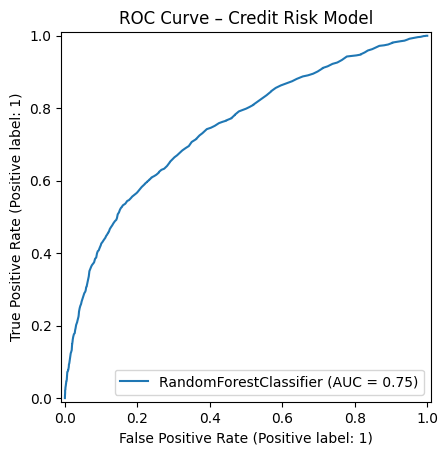

In [7]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

RocCurveDisplay.from_estimator(rf_sm, X_test, y_test)
plt.title("ROC Curve – Credit Risk Model")
plt.show()

Model po SMOTE:

skuteczniej wykrywa klientów ryzykownych

może działać jako system wczesnego ostrzegania

pozwala ograniczać straty kredytowe

Model performance

ROC-AUC ≈ 0.75 wskazuje na dobrą zdolność rozróżniania klas jak na dane finansowe bez zaawansowanego feature engineering.

Model jest stabilny i interpretowalny.

In [8]:
!pip install shap


100%|===================| 599/600 [04:48<00:00]       

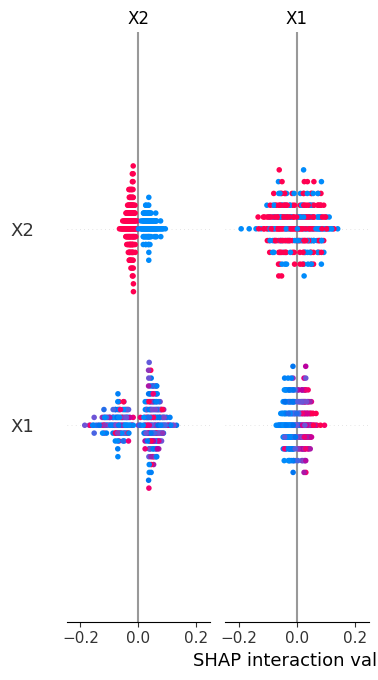

In [12]:
import shap

# próbka
X_sample = X_test.sample(300, random_state=42)

# konwersja do numpy
X_sample_np = X_sample.values

# explainer
explainer = shap.Explainer(rf_sm, X_sample_np)

shap_values = explainer(X_sample_np)

# wykres summary
shap.summary_plot(shap_values, X_sample_np, feature_names=X_sample.columns)


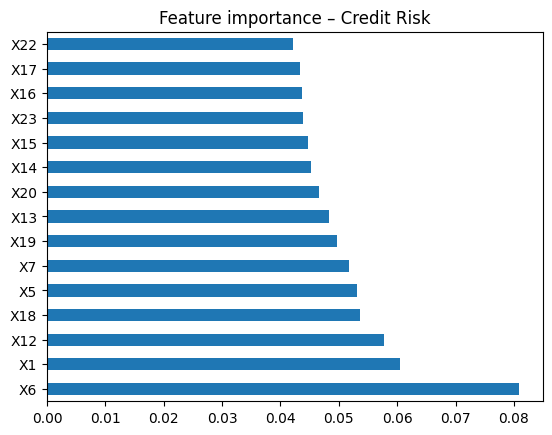

In [14]:
import matplotlib.pyplot as plt

feat_imp = pd.Series(
    rf_sm.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

feat_imp.head(15).plot(kind="barh")
plt.title("Feature importance – Credit Risk")
plt.show()


Model najbardziej patrzy na ostatnie zachowania płatnicze klienta.

Jeśli ktoś ostatnio spóźnia się ze spłatą → większe ryzyko default.

X1 (limit kredytowy)


Wysokość przyznanego limitu.



Klienci z wyższym limitem często mają inną charakterystykę ryzyka.



Banki realnie używają tej zmiennej.

 X12–X18 (historia płatności)


Kwoty wcześniejszych płatności.


# Model widzi:

regularność spłat

wysokość spłat

zachowania finansowe